# Milestone 2 (Alternate): SVD Analysis and Component Selection
**Due: Should be finished by 2/18/2025**

## Overview
Building on your covariance analysis from Milestone 1, you'll now implement SVD-based analysis techniques and explore how to select important components. This connects directly to Lessons 11 (Feature Scaling) and 12 (SVD and Covariance).

Continue using your chosen dataset from Milestone 1:
1. Stock Returns (`stock_returns.csv`)
2. Sensor Readings (`sensor_readings.csv`)
3. Image Features (`image_features.csv`)

## Learning Objectives
1. Implement and understand SVD computation
2. Analyze explained variance through SVD
3. Compare different component selection methods
4. Visualize and interpret SVD results

## Required Deliverables

### 1. Implementation (40%)

# SVD Computation
The Singular Value Decomposition (SVD) is a fundamental matrix factorization:
- Decomposes data matrix X into U, s, and Vh
- U: New coordinate system based on data variation
- s: Importance of each direction (singular values)
- Vh: How original features combine into new directions

Key preprocessing choices:
- Centering: Remove mean to focus on variation
- Scaling: Make features comparable when units differ
- Both affect interpretation of results

In [2]:
# Milestone #2
# SVD Computation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import Tuple, List, Dict
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA

def compute_svd(X: np.ndarray, 
                center: bool = True,
                scale: bool = False) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Compute SVD of data matrix with optional preprocessing
    
    Args:
        X: Data matrix (n_samples, n_features)
        center: Whether to center the data
        scale: Whether to scale to unit variance
        
    Returns:
        U: Left singular vectors (n_samples, n_features)
           - Rows are observations
           - Columns are new coordinate directions
        s: Singular values in descending order
           - Square roots of eigenvalues
           - Measure importance of each direction
        Vh: Right singular vectors (n_features, n_features)
           - Rows are principal directions
           - Columns are original features
    """
    # TODO: Implement SVD computation
    # Hints:
    # - Remember centering from Milestone 1
    # - Consider when scaling helps/hurts interpretation
    # - Look up numpy.linalg.svd full_matrices parameter
    # - Think about numerical stability with small values

The mean of each feature is:
feature_1     0.000108
feature_2     0.000871
feature_3    -0.001745
feature_4    -0.009280
feature_5     0.008166
feature_6    -0.048795
feature_7    -0.012481
feature_8     0.070976
feature_9    -0.830300
feature_10    3.810474
dtype: float64
 With variance:
feature_1        0.000101
feature_2        0.000799
feature_3        0.005797
feature_4        0.044888
feature_5        0.368528
feature_6        2.992416
feature_7       22.911034
feature_8      177.299477
feature_9     1257.796154
feature_10    8935.616592
dtype: float64
The total variance is: 9999.999999999996


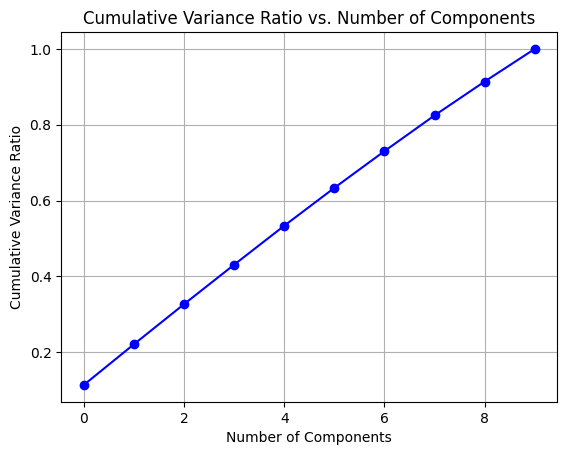

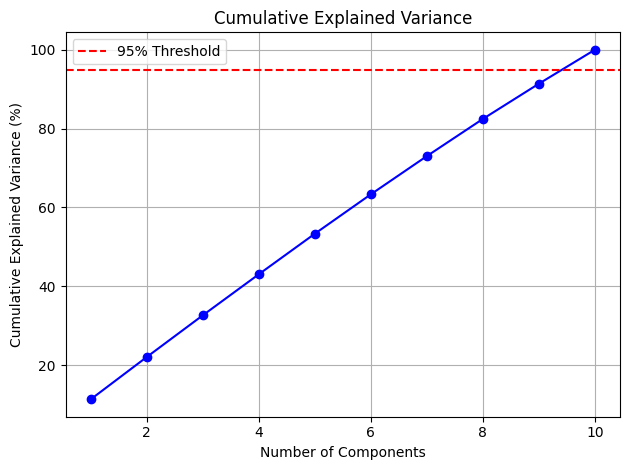

Explained Variance Ratio: [1.13596223 1.07377    1.05864711 1.0421375  1.02873472 1.00033608
 0.97016033 0.94361197 0.89439472 0.86225536]
Cumulative Explained Variance: [ 1.13596223  2.20973222  3.26837933  4.31051683  5.33925155  6.33958763
  7.30974796  8.25335993  9.14775465 10.01001001]


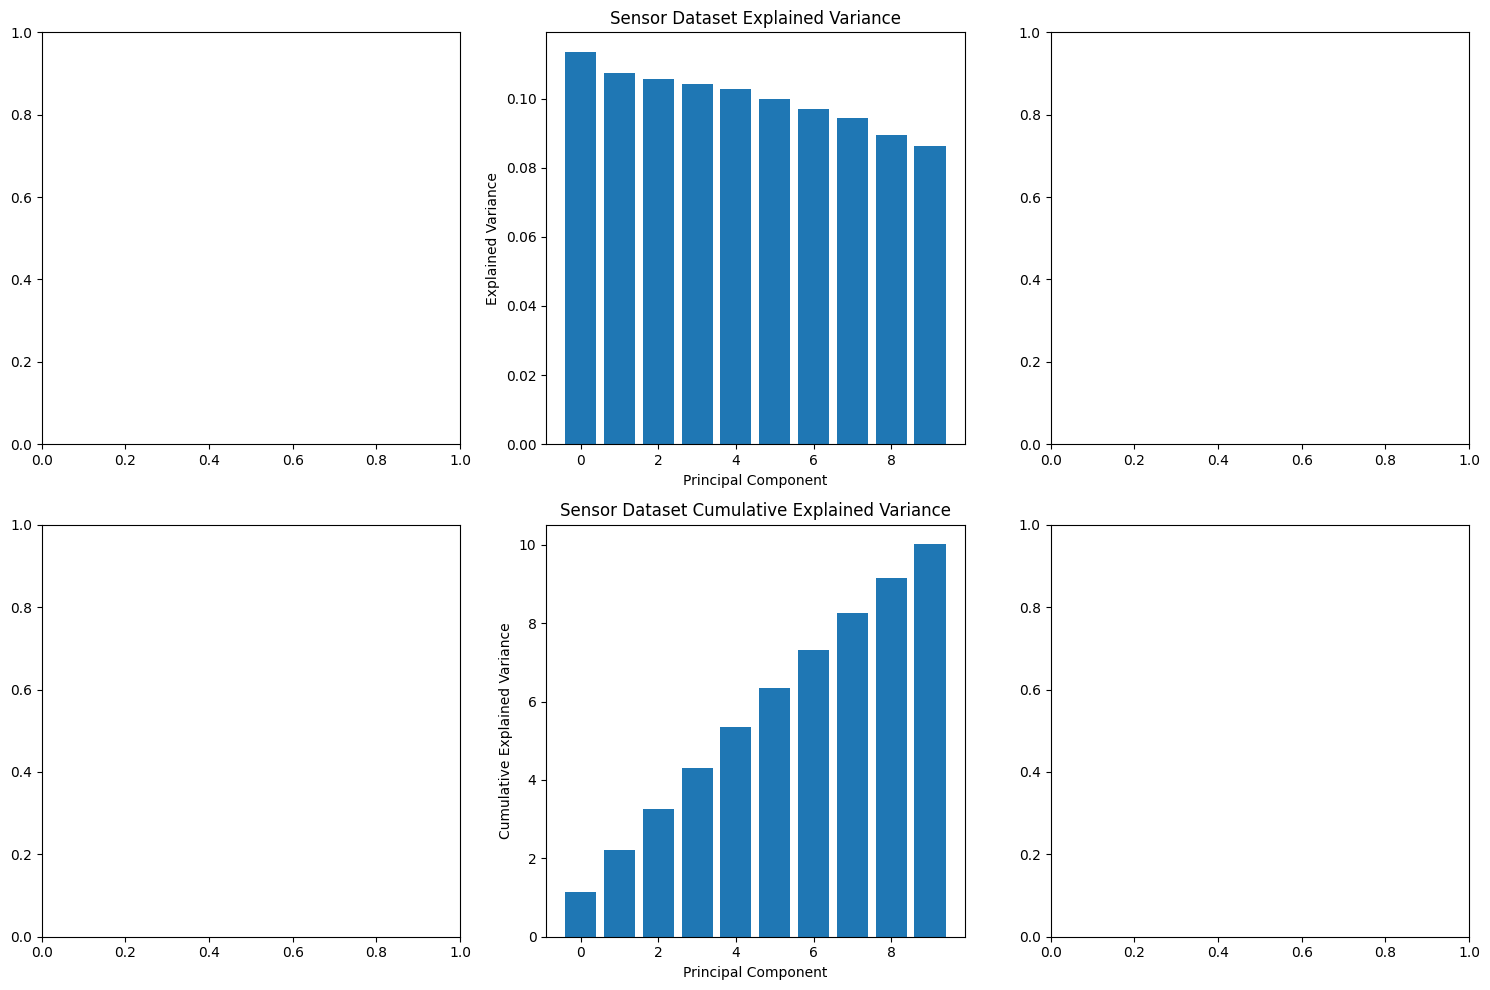

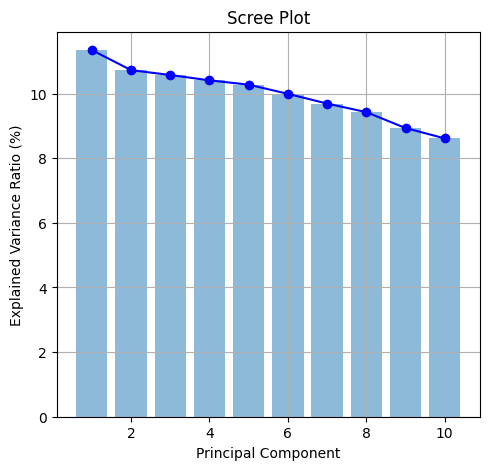

In [14]:
filename = 'datasets/sensor_readings.csv'
sensor_df = pd.read_csv(filename)
#Assigning the .csv file to the variable X and getting the mean of each feature (Column)
X = sensor_df
X.mean(axis=0)

#testing out the full_matrices
X1 = sensor_df.values

U1, s1, Vh1 = np.linalg.svd(X1, full_matrices=True)

#Scaling the data set
sensor_sc_df = StandardScaler().fit_transform(sensor_df)

#Find the SVD to get the U, s and Vh values
U, s, Vh = np.linalg.svd(sensor_sc_df)

#Squaring the singular value, s, to find the variances
var = np.square(s)

#Finding the total variance
total_var = np.sum(var)
print(f'The mean of each feature is:\n{X.mean(axis=0)}\n With variance:\n{X.var(axis=0)}')
print("The total variance is:", total_var)

sensor_pca = PCA(n_components=10)
sensor_pca.fit(sensor_sc_df)

#Verifying the Explained and Cumulative Variances
exp_var_ratio = sensor_pca.explained_variance_ratio_
exp_var_ratio

cum_var_ratio = np.cumsum(exp_var_ratio)
cum_var_ratio

#Threshold evaluation to determine number of components
threshold = 0.95
n_components = np.argmax(cum_var_ratio >= threshold) + 1
n_components

#Threshold adjustment to see how changing it various the number of components
threshold_adj = 0.85
n_comps = np.argmax(cum_var_ratio >= threshold_adj) + 1
n_comps

#Plotting the cumulative variance
plt.plot(cum_var_ratio, 'bo-')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Cumulative Variance Ratio vs. Number of Components")
plt.grid()
plt.show()

#Plotting Cumulative Variance with 95% Threshold limit indicated
plt.plot(range(1, len(cum_var_ratio) + 1), cum_var_ratio * 100, 'bo-')
plt.axhline(y=95, color='r', linestyle='--', label='95% Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

#Printing the values of the Explained Variance and the Cumulative Variance
print("Explained Variance Ratio:", sensor_pca.explained_variance_)
print("Cumulative Explained Variance:", sensor_pca.explained_variance_.cumsum())

#Plotting Both Explained Variances and Cumulative Variances
fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes[0, 1].bar(range(len(sensor_pca.explained_variance_ratio_)), sensor_pca.explained_variance_ratio_)
axes[0, 1].set_title('Sensor Dataset Explained Variance')
axes[0, 1].set_xlabel('Principal Component')
axes[0, 1].set_ylabel('Explained Variance')

axes[1, 1].bar(range(len(sensor_pca.explained_variance_ratio_)), sensor_pca.explained_variance_.cumsum())
axes[1, 1].set_title('Sensor Dataset Cumulative Explained Variance')
axes[1, 1].set_xlabel('Principal Component')
axes[1, 1].set_ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

#Closer look at the scree plot for the explained variance scree plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(exp_var_ratio) + 1), exp_var_ratio * 100, alpha=0.5, label='Individual')
plt.plot(range(1, len(exp_var_ratio) + 1), exp_var_ratio * 100, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio (%)')
plt.title('Scree Plot')
plt.grid(True)

# Explained Variance Analysis
This function quantifies how much variation each component captures:
- Square singular values to get variances
- Convert to percentages of total variance
- Cumulative sum shows total explained variance
- Helps decide how many components to keep

In [ ]:
def analyze_explained_variance(s: np.ndarray) -> Dict[str, np.ndarray]:
    """
    Analyze explained variance from singular values
    
    Args:
        s: Array of singular values
        
    Returns:
        Dictionary with:
        - explained_variance_ratio
        - cumulative_variance_ratio
    """
    # TODO: Compute variance ratios

# Component Selection
This function implements automated dimension selection:
- Uses explained variance to choose components
- threshold parameter sets minimum variance to retain
- Higher threshold keeps more components
- Lower threshold gives more aggressive reduction
- Balance between complexity and information retention

In [2]:
def select_components(s: np.ndarray,
                     threshold: float = 0.95) -> int:
    """
    Select number of components using variance threshold
    
    Args:
        s: Array of singular values
        threshold: Minimum cumulative variance to explain
        
    Returns:
        Number of components to keep
    """
    # TODO: Implement component selection

#### SVD Analysis
1. For a simple 2×2 matrix (choose one):
   ```
   A = [2 1]    or    B = [3 0]    or    C = [1 1]
       [1 2]          [0 2]             [1 0]
   ```
   - Compute SVD by hand showing all steps
   - Verify your result multiplying U·Σ·V^T
   - Compare with numpy.linalg.svd output

2. For your chosen dataset:
   - Apply your SVD implementation
   - Analyze effect of preprocessing
   - Interpret U, s, and Vh matrices

#### Component Selection
- Implement and compare methods:
  * Variance threshold (e.g., keep 90% of variance)
  * Elbow method (plot variance vs components)
  * Kaiser criterion (keep components with σᵢ > mean(σ))
- Justify your recommendations